## Imports

In [1]:
import os
import numpy as np
import time
import processing as process

import matplotlib.pyplot as plt
%matplotlib inline

## Run Batch Processing on EXP374

In [2]:
#######################################################################################################################
## SET ROOT FOLDERS ##
#######################################################################################################################

inbase = 'C:\\Users\\levay_b\\Work\\XRF_Imager\\Processed_Images\\input_14bit'
outbase = 'C:\\Users\\levay_b\\Desktop\\old_proc\\python_Dec14'

folder = '374-U1524A-23H'

infolder = os.path.join(inbase, folder)
outroot = os.path.join(outbase, folder)

In [3]:
#######################################################################################################################
## CALCULATE RAW HISTOGRAM ##
#######################################################################################################################

start = time.time()
bin_edges, hist_raw = process.histogram_14b(infolder)
end = time.time()
print("{:.2f} minutes".format((end-start)/60))

0.04 minutes


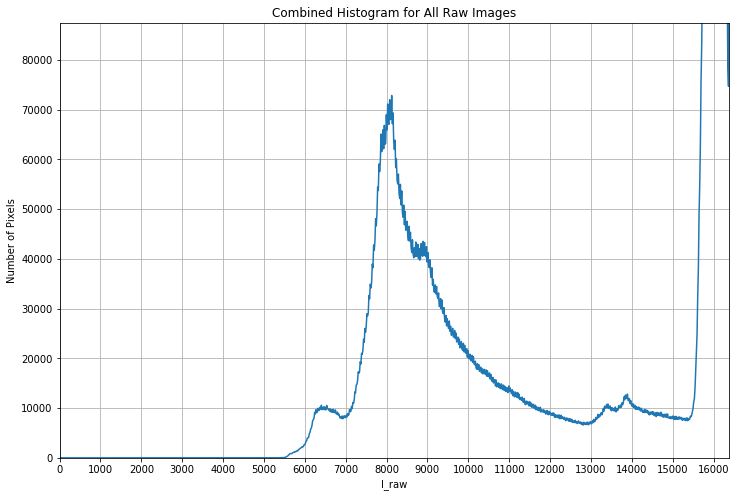

In [4]:
#######################################################################################################################
## PLOT RAW HISTOGRAM ##
#######################################################################################################################

I_14b_bounds = (0.0, 16383.0)
I_16b_bounds = (0.0, 65535.0)

y_max = 1.2*np.amax(hist_raw[10:-50])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(bin_edges[:-1], hist_raw)
ax.set_xlim([I_14b_bounds[0], I_14b_bounds[1]])
ax.set_ylim([0.0, y_max])
ax.set_xticks(np.arange(0.0, 17000.0, 1000.0))
ax.grid()
ax.set_title("Combined Histogram for All Raw Images")
ax.set_xlabel('I_raw')
ax.set_ylabel('Number of Pixels')
plt.show()

In [5]:
#######################################################################################################################
## PROCESSING SETTINGS ##
#######################################################################################################################

## 72mm = Outside Diameter of Liner => 3.6cm radius
## 67mm = Inside Diameter of Liner => 3.35cm radius
## 58mm = Rotary Diameter => 2.9cm radius

geom = {'nrows': 1550, 'ncols': 1032, 'px_size': 0.0099, 
        'radius': 3.2, 'core_type': 'HR', 'core_ht': 0.5, 
        'src_ht': 65.0, 'x_src': 5.113, 'y_src': 7.667, 'roi': 12.5}

cfg = {'t_min': 0.5, 'I_low': 4000, 'I_peak': 8000, 'I_high': 16000}

## 13.0 bases and raws: 2000-2800-7000
## 363-U1487B-6H-5: 2000-4200-12000 (Radius = 3.60)
## 374-U1524A-5H-6: 4000-5500-10000 (Radius = 3.35)

#######################################################################################################################
## CREATE SUBFOLDER ##
#######################################################################################################################

cstr = 'wComp'
if cfg['t_min'] > 2*geom['radius']:
    cstr = 'noComp'
rstr = 'R-' + str(geom['radius']).replace('.', 'p')
hstr = 'H-' + '{:.0f}'.format(cfg['I_low']) + '-' + '{:.0f}'.format(cfg['I_peak']) + '-' + '{:.0f}'.format(cfg['I_high'])
subfolder = cstr + '_' + rstr + '_' + hstr
outfolder = os.path.join(outroot, subfolder)

if not os.path.exists(outfolder):
    os.makedirs(outfolder)

In [6]:
#######################################################################################################################
## PROCESS IMAGES ##
#######################################################################################################################

start = time.time()
bin_edges, hist_proc = process.batch_14to16bit(infolder, outfolder, geom, cfg)
end = time.time()
print("{:.2f} minutes".format((end-start)/60))

0.35 minutes


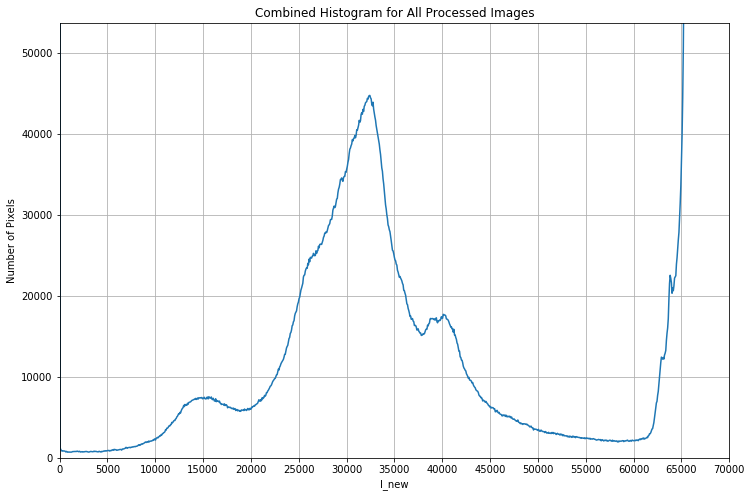

In [7]:
#######################################################################################################################
## PLOT PROCESSED HISTOGRAM ##
#######################################################################################################################

y_max = 1.2*np.amax(hist_proc[10:-50])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(bin_edges[:-1], hist_proc)
ax.set_xlim([0.0, I_16b_bounds[1]])
ax.set_ylim([0.0, y_max])
ax.set_xticks(np.arange(0.0, I_16b_bounds[1]+5000.0, 5000.0))
ax.grid()
ax.set_title("Combined Histogram for All Processed Images")
ax.set_xlabel('I_new')
ax.set_ylabel('Number of Pixels')
plt.show()